#<font color = "#C82909">**RETINA FACE + DEEP FACE + VGG-FACE**
---


##<font color = "#00000080"> **RETINA FACE**
<font color = "#00000080">Modelo de detección de rostros de alta precisión deinifo en un solo paso. Se comporta bien incluso cambiando el tamaño, orientación e iluminación de las imágenes.

<font color = "#00000080">Su arquitectura principal es ResNet y, por tanto, es una red extremadamente produnda.

<font color = "#00000080">Es capaz de realizar distintas tareas:
* <font color = "#00000080">**Clasificación:** determinar si hay rostro o no.
* <font color = "#00000080">**Bounding box:** dibujar un cuadro delimitador alrededor del rostro.
* <font color = "#00000080"> **Localización de puntos clave:** que servirán como referencia. Son los ojos, la nariz y las comisuras de la boca.

<font color = "#00000080">Además, destaca por su alineación facial. Al identificar dónde se encuentran los ojos y la boca, puede calcular cómo de rotado se encuentra el rostro y, mediante transformaciones afines, hacer que los ojos queden sobre una misma línea horizontal fija.

<font color = "#00000080">Por otro lado, cuenta con una estructur de pirámide de características que le permite detectar rostros densamente agrupapdos, como es el caso de la imagen que vemos a continuación.

<img src="https://lh5.googleusercontent.com/proxy/OeMN4ETYeJ8QdWFHBxVBLeSzig9eV1jQTvWiDvaLP7o7gTN-v1Ayez1BdjusS6Bmyz1_iLdlxHWuCDxxgCIZlDT-CzddLxbNcHa0et0Ye0X8hFYOBxGKzZkGxj8FjqPo_BnMkx9u0pD90F3Kfw" width="600">


<img src="https://raw.githubusercontent.com/serengil/retinaface/master/tests/outputs/alignment-procedure.png" width="600">

---

##<font color = "#00000080"> **DEEP FACE**
<font color = "#00000080">DeepFace es una librería de Visión por Computador de python que agrupa varios modelos de inteligencia artificial. Su instalación es fácil, pues solo hay que ejecutar ```!pip install deepface```. Concretamente, usamos la función ``analyze``, que recibe:
* <font color = "#00000080"> Una imagen de entrada
* <font color = "#00000080"> Vector de factores que queremos estimar
* <font color = "#00000080"> detector (modelo)
* <font color = "#00000080">si queremos evitar que el programa se cuelgue
* <font color = "#00000080"> si queremos que alinee los rostros
* <font color = "#00000080"> si queremos silenciar las notificaciones.

---

##<font color = "#00000080"> **VGG FACE**
<font color = "#00000080">Aunque no lo llamamos directamente, cuando indicamos que queremos inferir una emoción, DeepFace invoca a VGG o a ResNet entrenada con FER-2013. Por defecto, llama a VGG Face.

Esta red neuronal está diseñada específicamante para el reconocimiento facial y destaca por mejorar los modelos anteriores mediante el uso de kernels más pequeños.
<img src="https://i1.wp.com/sefiks.com/wp-content/uploads/2019/04/vgg-face-architecture.jpg?ssl=1" width="800">

---

##<font color = "#00000080"> **MODELO EN CASCADA**
<font color = "#00000080"> Los beneficios de usar un detector específico para cada paso son:
* <font color = "#00000080"> **Especialización de tareas:** sistema modular.
* <font color = "#00000080"> **Precisión mediante alineación**
* <font color = "#00000080"> **Eficiencia:** una vez que tenemos el rostro o el conjunto de rostros, no hay que fijarse en el resto de la imagen para detectar emociones.


In [5]:
!pip install deepface

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.4/59.4 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 89.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 4.7 MB/s eta 0:00:00


In [8]:
#-----------------------------------
#cargamos las librerías
#---------------------------------------------
import cv2
import numpy as np
import torch
from google.colab.output import eval_js
from base64 import b64decode
from IPython.display import display, Javascript, HTML
from google.colab.patches import cv2_imshow
from deepface import DeepFace
import warnings

# Silenciar advertencias
warnings.filterwarnings("ignore")

#------------------------------------------
# interfaz
#------------------------------------------
html_interface = """
<div id="container" style="padding: 20px; background-color: #f0f0f0; border-radius: 15px; text-align: center; font-family: sans-serif;">
  <h3 style="color: #333;">Detector Avanzado (RetinaFace + Emoción/Edad)</h3>
  <video id="video" autoplay playsinline style="width: 480px; border: 5px solid #4CAF50; border-radius: 10px; box-shadow: 0 4px 8px rgba(0,0,0,0.2);"></video>
  <br><br>
  <button id="capture-btn" style="padding: 15px 30px; background-color: #4CAF50; color: white; border: none; border-radius: 5px; cursor: pointer; font-size: 16px; font-weight: bold; transition: 0.3s;">
    📸 CAPTURAR Y ANALIZAR
  </button>
</div>
"""

#----------------------------------------
#tunelización entre el navegador y google
#----------------------------------------


def capture_and_analyze_styled():

    #mostramos la interfaz
    display(HTML(html_interface))


    #ste código se ejecuta en el navegador
    js = Javascript('''
        async function startCamera() {
            const video = document.getElementById('video');
            const captureBtn = document.getElementById('capture-btn');

            // Solicitar acceso a cámara
            const stream = await navigator.mediaDevices.getUserMedia({
                video: { width: 640, height: 480 }
            });

            //transmisión
            video.srcObject = stream;

            return new Promise((resolve) => {
                captureBtn.onclick = () => {
                    const canvas = document.createElement('canvas');
                    canvas.width = video.videoWidth;
                    canvas.height = video.videoHeight;
                    canvas.getContext('2d').drawImage(video, 0, 0);

                    // Detener cámara y ocultar interfaz
                    stream.getVideoTracks()[0].stop();
                    document.getElementById('container').style.display = 'none';

                    // transformar imagen en cadena de texto
                    resolve(canvas.toDataURL('image/jpeg', 0.9));
                };
            });
        }
    ''')

    #mostrar la imagen
    display(js)

    #devolver la cadena de texto que representa la imagen
    return eval_js('startCamera()')


<IPython.core.display.Javascript object>

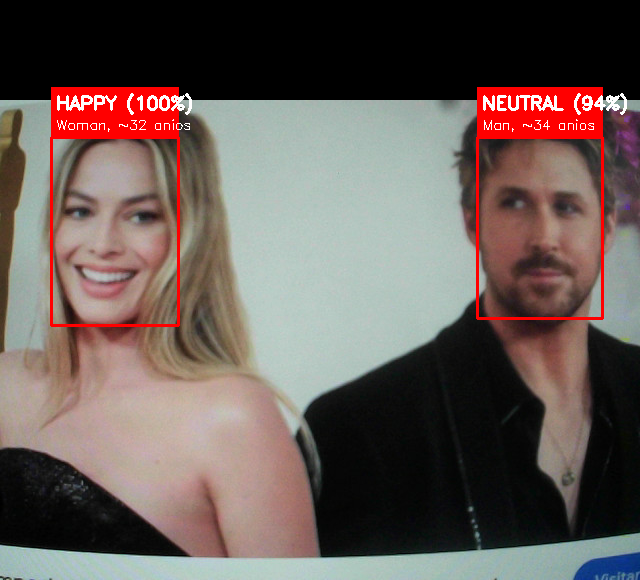

In [10]:
#-------------------------------------------------------------------------------
#EJECUCIÓN PRINCIPAL
#-------------------------------------------------------------------------------
try:
    data = capture_and_analyze_styled()

    # Decodificar imagen

    binary = b64decode(data.split(',')[1])
    frame = cv2.imdecode(np.frombuffer(binary, np.uint8), -1)

    frame = cv2.copyMakeBorder(frame,100,0,0,0,cv2.BORDER_CONSTANT, value=[0, 0, 0])


    # RetinaFace + Alineación
    results = DeepFace.analyze(
        #imagen
        img_path = frame,

        #qué quiero activar
        actions = ['emotion', 'age', 'gender'],

        #detector de cara
        detector_backend = 'retinaface',

        #evitar que el programa se cuelgue
        enforce_detection = False,

        #alineación
        align = True,

        #evitar mensajes
        silent = True
    )

    # analizar distintas personas y obtener coordenadas
    for res in results:
        region = res['region']
        x, y, w, h = region['x'], region['y'], region['w'], region['h']

        # Ignorar detecciones muy pequeñas
        if w < 40: continue

        # Extraer datos
        emotion = res['dominant_emotion']
        emotion_conf = res['emotion'][emotion]
        age = int(res['age'])
        gender = res['dominant_gender']



        #PASOS DIBUJAR
        color = (0, 0, 255)

        # rectángulo facial
        cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)

        # Etiquetas de texto
        label_top = f"{emotion.upper()} ({emotion_conf:.0f}%)"
        label_bottom = f"{gender}, ~{age} anios"

        # 3. Fondo
        cv2.rectangle(frame, (x, y - 50), (x + w, y), color, -1)

        # Emoción
        cv2.putText(frame, label_top, (x + 5, y - 28),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

        # Edad/Genero
        cv2.putText(frame, label_bottom, (x + 5, y - 8),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.45, (255, 255, 255), 1)

    cv2_imshow(frame)

except Exception as e:
    print(f"Error: {e}")